In [137]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree  import DecisionTreeClassifier
from sklearn.tree  import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix



In [9]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
df.columns = ['age','sex','cp','restbp','chol','fbs','restecg','talach','exang','oldpeak','slope','ca','thal','hd']

In [11]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,talach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [12]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
talach     float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

## Dealing with missing values

In [14]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [22]:
df.ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [15]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [23]:
df.thal.value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [16]:
df.isnull().sum(axis = 0)

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
talach     0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [26]:
df.loc[(df['ca']=='?')| (df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,talach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [31]:
#df[[('ca'=='?') | ('thal'=='?')]]
df.query('ca=="?" | thal=="?" ')

,age,sex,cp,restbp,chol,fbs,restecg,talach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [38]:
remove = (df['ca']=='?') | (df['thal']=='?')

In [39]:
df = df[-remove]

In [40]:
df.shape

(297, 14)

In [41]:
df.query('ca=="?" | thal=="?" ')

,age,sex,cp,restbp,chol,fbs,restecg,talach,exang,oldpeak,slope,ca,thal,hd


In [48]:
df['hd'].unique()

array([0, 2, 1, 3, 4])

In [44]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
talach     float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [115]:
#Split the data into DV and IV's
X = df.drop('hd',axis=1)
X.shape

(297, 13)

In [116]:
y = df['hd']
y.shape

(297,)

## Format Data - Hot encoding

In [53]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
talach     float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

### Valies for thal
1. Typica angina
2. Atypical angina
3. non-angina pain
4. asymptomatic

In [88]:
X.thal.value_counts()

3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64

In [87]:
#transform value into int 
X['cp'] = X['cp'].astype(int)
X['restecg'] = X['restecg'].astype(int)
X['slope'] = X['slope'].astype(int)
X['thal'] = X['thal'].astype(int)

ValueError: invalid literal for int() with base 10: '6.0'

In [67]:
X['thal'] = X['thal'].astype(int)

ValueError: invalid literal for int() with base 10: '6.0'

In [89]:
X.shape

(297, 13)

### Transfor CP into hot-encoding


In [107]:
# Test the result of get dummies
pd.get_dummies(X,columns=['cp','restecg','slope','thal'])

,age,sex,restbp,chol,fbs,talach,exang,oldpeak,ca,cp_1,...,cp_4,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,0,...,1,1,0,0,0,1,0,0,0,1
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,1,...,0,1,0,0,0,1,0,0,0,1
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,0,...,1,1,0,0,0,1,0,0,0,1
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,0,...,1,1,0,0,0,1,0,0,0,1


In [121]:
X_dummy = pd.get_dummies(X,columns=['cp','restecg','slope','thal'])
X_dummy.shape

(297, 22)

In [122]:
X_dummy.head()

,age,sex,restbp,chol,fbs,talach,exang,oldpeak,ca,cp_1,...,cp_4,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [123]:
y.unique()

array([0, 1])

### Valies HD (y)
0. No heart disease
1. Type of heart disease
2. Type of heart disease
3. Type of heart disease
4. Type of heart disease

In [124]:
query = y>0 #create index
y[query] = 1
y.unique()

array([0, 1])

In [126]:
print(X_dummy.shape)
print(y.shape)

(297, 22)
(297,)


# Model Buildng

In [127]:
X_train,X_test, y_train,y_test = train_test_split(X_dummy,y,random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train,y_train)

[Text(191.93275862068964, 208.38, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = no HD'),
 Text(111.11896551724138, 190.26, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = no HD'),
 Text(67.82586206896552, 172.14, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = no HD'),
 Text(49.06551724137931, 154.01999999999998, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = no HD'),
 Text(28.86206896551724, 135.89999999999998, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = no HD'),
 Text(17.317241379310346, 117.77999999999999, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = no HD'),
 Text(11.544827586206896, 99.66, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = no HD'),
 Text(5.772413793103448, 81.53999999999999, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = no HD'),
 Text(17.317241379310346, 81.53999999999999, 'exang <= 0.5\ngini = 0.5\nsamples =

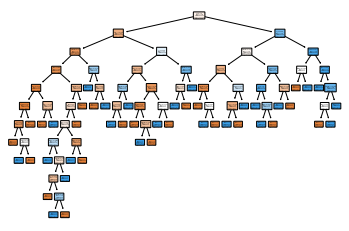

In [129]:
#plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,filled=True,rounded=True,class_names=['no HD','yes HD'],feature_names=X_dummy.columns)

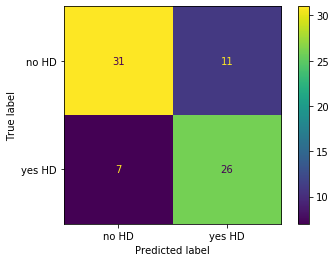

In [131]:
plot_confusion_matrix(clf_dt,X_test,y_test, display_labels=['no HD','yes HD'])

Total of people without HD is 42 (31+11) 31 (74%) correclty predicted
<br>Total people with HD is 33 (7+26) only 26 (79%) correclty predicted

## Prunning the tree to fix over fiting

In [132]:
path = clf_dt.cost_complexity_pruning_path(X_train,y_train)

In [133]:
cpp_alphas = path.ccp_alphas #extract different values for alpha
cpp_alphas = cpp_alphas[:-1] #explude the maximum value for alpha

decision_trees =[] #create array to save each tree info


In [134]:
#citerate and create  decision tree for each value of alpha
for alpha in cpp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=alpha)
    clf_dt = clf_dt.fit(X_train,y_train)
    decision_trees.append(clf_dt)
    

In [135]:
train_scores = [clf_dt.score(X_train,y_train) for clf_dt in decision_trees]
test_scores = [clf_dt.score(X_test,y_test) for clf_dt in decision_trees]

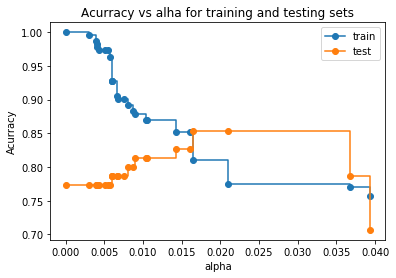

In [140]:
fig,ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('Acurracy')
ax.set_title('Acurracy vs alha for training and testing sets')
ax.plot(cpp_alphas,train_scores,marker='o',label='train',drawstyle='steps-post')
ax.plot(cpp_alphas,test_scores,marker='o',label='test',drawstyle='steps-post')
ax.legend()
plt.show()

## Cross validation for findng best alpha

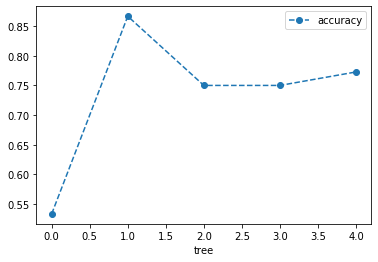

In [142]:
clf_dt = DecisionTreeClassifier(random_state=42,ccp_alpha=0.016) #ccp alpha taken from previous step
folds = 5 #5 fold validation because sample is small
scores = cross_val_score(clf_dt,X_train,y_train,cv=folds) # 
df = pd.DataFrame(data={'tree':range(folds),'accuracy':scores})
df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

Tha graph shows that the accuracy varies aming different dataset samples,  meaning that the alpha is sensitive to the dataset

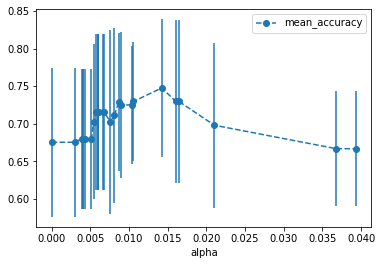

In [143]:
alpha_values = [] #create array to store different alpha values
for alpha in cpp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=alpha)
    folds = 5 #5 fold validation because sample is small
    scores = cross_val_score(clf_dt,X_train,y_train,cv=folds)
    alpha_values.append([alpha,np.mean(scores),np.std(scores)])
alpha_results = pd.DataFrame(alpha_values,columns=['alpha','mean_accuracy','std'])
alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

we can observe the optimal alpha value after cross validation is more close to 0.014

In [145]:
alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [146]:
ideal_alpha= alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]['alpha']

In [147]:
ideal_alpha = float(ideal_alpha)

In [148]:
ideal_alpha

0.014224751066856332

In [149]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train,y_train)

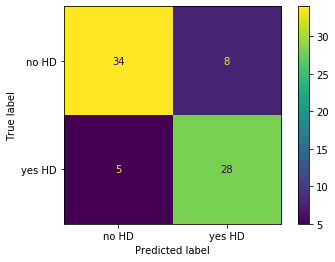

In [150]:
plot_confusion_matrix(clf_dt_pruned,X_test,y_test, display_labels=['no HD','yes HD'])

[Text(482.8846153846154, 356.7375, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = no HD'),
 Text(257.53846153846155, 254.8125, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = no HD'),
 Text(128.76923076923077, 152.8875, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = no HD'),
 Text(64.38461538461539, 50.96249999999998, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = no HD'),
 Text(193.15384615384616, 50.96249999999998, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = yes HD'),
 Text(386.3076923076923, 152.8875, 'cp_4 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = yes HD'),
 Text(321.9230769230769, 50.96249999999998, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = no HD'),
 Text(450.69230769230774, 50.96249999999998, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = yes HD'),
 Text(708.2307692307693, 254.8125, 'cp_4 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = yes HD'),

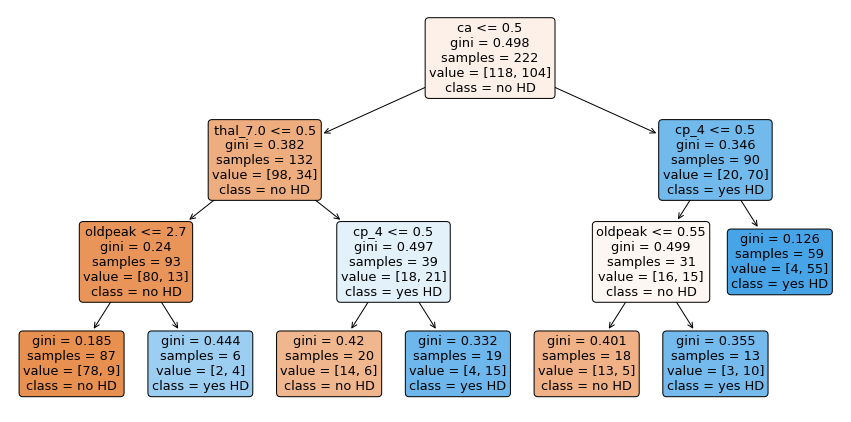

In [151]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=['no HD','yes HD'],feature_names=X_dummy.columns)